In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

country_profiles_file = "country_profile_variables.csv"


In [2]:
# loading csv file and putting into dataframe

country_data = pd.read_csv(country_profiles_file, header=0) 

country_data.dropna() 

country_data = country_data[country_data['GDP: Gross domestic product (million current US$)'] != -99]

country_data['GDP: Gross domestic product (million current US$)'] = pd.to_numeric(country_data['GDP: Gross domestic product (million current US$)'], downcast='float')


country_data.head()


,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270.0,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541.0,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779.0,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812.0,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99
5,Angola,MiddleAfrica,1246700,29784,23.9,96.2,117955.0,3.0,4714.1,6.8,...,12.4,146,46.5,34.8/1.4,3902,25,75.4/28.2,88.6/22.5,0.42,-99


In [3]:
#Create health dataframe and clean up missing values
health_df = pd.DataFrame(country_data.loc[:, ["country", "Region", "GDP: Gross domestic product (million current US$)", 
                                              "GDP per capita (current US$)",
                                              "Health: Total expenditure (% of GDP)",
                                              "Health: Physicians (per 1000 pop.)",'Life expectancy at birth (females/males, years)']])

#health_df.reset_index()


#health_df.dropna(axis=0, how='all', inplace=True)

#health_df = health_df.set_index("Life expectancy at birth (females/males, years)")
health_df=health_df.set_index("Life expectancy at birth (females/males, years)")

# Cleaning the data to drop values ".../..." and "-99".
# health_df = health_df.dropna(how="any")
health_df = health_df.drop(".../...", axis = 0)

health_df = health_df.drop("-99", axis = 0)
health_df = health_df.reset_index()
health_df = health_df.set_index("country")
health_df.head()




,"Life expectancy at birth (females/males, years)",Region,GDP: Gross domestic product (million current US$),GDP per capita (current US$),Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.)
country,,,,,,
Afghanistan,63.5/61.0,SouthernAsia,20270.0,623.2,8.2,0.3
Albania,79.9/75.6,SouthernEurope,11541.0,3984.2,5.9,1.3
Algeria,76.5/74.1,NorthernAfrica,164779.0,4154.1,7.2,...
Angola,63.0/57.4,MiddleAfrica,117955.0,4714.1,3.3,...
Antigua and Barbuda,78.2/73.3,Caribbean,1356.0,14764.5,5.5,-99


In [4]:
# create a new list for males and one for females
life_list = list(health_df['Life expectancy at birth (females/males, years)'])
new_life_list = [value.split("/") for value in life_list]
male_part = [float(value[0]) for value in new_life_list]
female_part = [float(value[1]) for value in new_life_list]

health_df.head()


,"Life expectancy at birth (females/males, years)",Region,GDP: Gross domestic product (million current US$),GDP per capita (current US$),Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.)
country,,,,,,
Afghanistan,63.5/61.0,SouthernAsia,20270.0,623.2,8.2,0.3
Albania,79.9/75.6,SouthernEurope,11541.0,3984.2,5.9,1.3
Algeria,76.5/74.1,NorthernAfrica,164779.0,4154.1,7.2,...
Angola,63.0/57.4,MiddleAfrica,117955.0,4714.1,3.3,...
Antigua and Barbuda,78.2/73.3,Caribbean,1356.0,14764.5,5.5,-99


In [5]:
#drop life expectancy column and create two new columns one for male and one for female 

# adding new columns into dataframe
health_df.drop(["Life expectancy at birth (females/males, years)"], axis = 1, inplace = True)
health_df["Male Life Expectancy at birth"] = male_part
health_df["Female Life Expectancy at birth"] = female_part
new_health_df = health_df[["Region", 
                       "GDP: Gross domestic product (million current US$)",
                       "GDP per capita (current US$)",
                       "Male Life Expectancy at birth",
                       "Female Life Expectancy at birth"]]

health_df = health_df[health_df['Health: Total expenditure (% of GDP)'] != -99]


health_df.head()


,Region,GDP: Gross domestic product (million current US$),GDP per capita (current US$),Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Male Life Expectancy at birth,Female Life Expectancy at birth
country,,,,,,,
Afghanistan,SouthernAsia,20270.0,623.2,8.2,0.3,63.5,61.0
Albania,SouthernEurope,11541.0,3984.2,5.9,1.3,79.9,75.6
Algeria,NorthernAfrica,164779.0,4154.1,7.2,...,76.5,74.1
Angola,MiddleAfrica,117955.0,4714.1,3.3,...,63.0,57.4
Antigua and Barbuda,Caribbean,1356.0,14764.5,5.5,-99,78.2,73.3


In [6]:
#Rename columns
    
health_df = health_df.rename(columns={"Health: Physicians (per 1000 pop.)": "Physicians for every one thousand people"})
health_df = health_df.rename(columns={"country": "Country"})
health_df = health_df.rename(columns={"Health: Total expenditure (% of GDP)": "Total % of GDP spent on Healthcare"})
health_df = health_df.rename(columns={"GDP: Gross domestic product (million current US$)": "Total GDP in US$"})
health_df = health_df.rename(columns={"GDP per capita (current US$)": "GDP per person in US$"})
health_df.head()

,Region,Total GDP in US$,GDP per person in US$,Total % of GDP spent on Healthcare,Physicians for every one thousand people,Male Life Expectancy at birth,Female Life Expectancy at birth
country,,,,,,,
Afghanistan,SouthernAsia,20270.0,623.2,8.2,0.3,63.5,61.0
Albania,SouthernEurope,11541.0,3984.2,5.9,1.3,79.9,75.6
Algeria,NorthernAfrica,164779.0,4154.1,7.2,...,76.5,74.1
Angola,MiddleAfrica,117955.0,4714.1,3.3,...,63.0,57.4
Antigua and Barbuda,Caribbean,1356.0,14764.5,5.5,-99,78.2,73.3


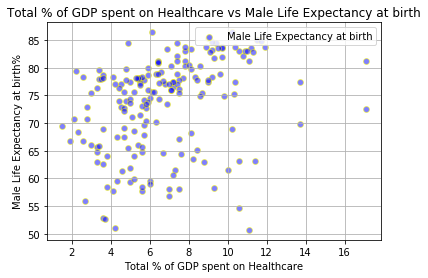

<Figure size 432x288 with 0 Axes>

In [7]:
#graph % of GDP spent on healthcare vs Male Life Expectancy at birth% and female Life Expectancy at birth%
plt.scatter(health_df["Total % of GDP spent on Healthcare"], 
            health_df["Male Life Expectancy at birth"], 
            marker = "o", color = "blue", 
            edgecolor = "yellow", 
            alpha = .5)

plt.title("Total % of GDP spent on Healthcare vs Male Life Expectancy at birth")
plt.ylabel("Male Life Expectancy at birth%")
plt.xlabel("Total % of GDP spent on Healthcare")
plt.grid(True)
plt.legend(loc=1)
plt.show()
plt.savefig('male_life')

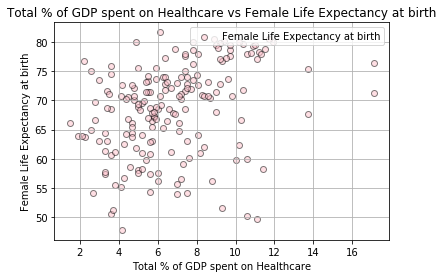

<Figure size 432x288 with 0 Axes>

In [8]:
#graph % of GDP spent on healthcare vs Male Life Expectancy at birth% and female Life Expectancy at birth%
plt.scatter(health_df["Total % of GDP spent on Healthcare"], 
            health_df["Female Life Expectancy at birth"], 
            marker = "o", color = "pink", 
            edgecolor = "black", 
            alpha = .5)


plt.title("Total % of GDP spent on Healthcare vs Female Life Expectancy at birth")
plt.ylabel("Female Life Expectancy at birth")
plt.xlabel("Total % of GDP spent on Healthcare")
plt.grid(True)
plt.legend(loc=1)
plt.show()
plt.savefig('Female_life')